In [327]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, fbeta_score, classification_report

In [328]:
data = pd.read_csv("data/NEO_v2_refined.csv")
data_res_adasyn = pd.read_csv("data/NEO_v2_refined_res_adasyn.csv")
data_res_smoteenn = pd.read_csv("data/NEO_v2_refined_res_smoteenn.csv")

In [329]:
X = data.drop(columns=["hazardous", "id"])
y = data["hazardous"]

X_res_smoteenn = data_res_smoteenn.drop(columns=["hazardous"])
y_res_smoteenn = data_res_smoteenn["hazardous"]

X_res_adasyn = data_res_adasyn.drop(columns=["hazardous"])
y_res_adasyn = data_res_adasyn["hazardous"]


In [330]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.33, random_state=42)
X_train_res_smoteenn, X_test_res_smoteenn, y_train_res_smoteenn, y_test_res_smoteenn  = train_test_split (X_res_smoteenn , y_res_smoteenn , test_size=0.33, random_state=42)
X_train_res_adasyn, X_test_res_adasyn, y_train_res_adasyn, y_test_res_adasyn = train_test_split (X_res_adasyn, y_res_adasyn, test_size=0.33, random_state=42)

No cost-sensitive leraning No resampling

In [331]:
decision_tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
f2score = fbeta_score(y_test, y_pred, beta=2)

In [332]:
bayes = ComplementNB().fit(X_train, y_train)

y_pred = bayes.predict(X_test)

In [333]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.5587136375767281
F2 score: 0.3263224230966166
ROC AUC score: 0.5601264716218938
---------------------------------------------------------


Si cost-sensitive leraning No resampling

In [334]:
decision_tree = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train, y_train) # Cost sensitive learning con "balanced"

y_pred = decision_tree.predict(X_test)
f2score_cost_learning = fbeta_score(y_test, y_pred, beta=2)

In [335]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.8914798505471043
F2 score: 0.4323308270676691
ROC AUC score: 0.685452955544512
---------------------------------------------------------


In [336]:
bayes = ComplementNB().fit(X_train, y_train)

y_pred = bayes.predict(X_test)

In [337]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 score:", fbeta_score(y_test, y_pred, beta=2))
print("ROC AUC score:", roc_auc_score(y_test, y_pred))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.5587136375767281
F2 score: 0.3263224230966166
ROC AUC score: 0.5601264716218938
---------------------------------------------------------


No cost-sensitive leraning Si resampling

In [338]:
decision_tree_res_smoteenn = DecisionTreeClassifier(random_state=0).fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn.predict(X_test_res_smoteenn)
f2score_res_smoteenn = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [339]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2))
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9276103521658543
F2 score: 0.9251725129384702
ROC AUC score: 0.9275301832042604
---------------------------------------------------------


In [340]:
decision_tree_res_adasyn = DecisionTreeClassifier(random_state=0).fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn.predict(X_test_res_adasyn)
f2score_res_adasyn = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [341]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2))
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9381538796861377
F2 score: 0.9407503252546939
ROC AUC score: 0.9380808521401336
---------------------------------------------------------


In [342]:
bayes = ComplementNB().fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = bayes.predict(X_test_res_smoteenn)

In [343]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2))
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.599540056291618
F2 score: 0.6077171785926997
ROC AUC score: 0.6002788045423455
---------------------------------------------------------


Si cost-sensitive leraning Si resampling

In [344]:
decision_tree_res_smoteenn = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = decision_tree_res_smoteenn.predict(X_test_res_smoteenn)
f2score_res_smoteenn_cost_learning = fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2)

In [345]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2))
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9287773735154802
F2 score: 0.9270276484451341
ROC AUC score: 0.9287435338554015
---------------------------------------------------------


In [346]:
decision_tree_res_adasyn = DecisionTreeClassifier(random_state=0, class_weight="balanced").fit(X_train_res_adasyn, y_train_res_adasyn)

y_pred_res_adasyn = decision_tree_res_adasyn.predict(X_test_res_adasyn)
f2score_res_adasyn_cost_learning = fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2)

In [347]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_adasyn, y_pred_res_adasyn))
print("F2 score:", fbeta_score(y_test_res_adasyn, y_pred_res_adasyn, beta=2))
print("ROC AUC score:", roc_auc_score(y_test_res_adasyn, y_pred_res_adasyn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.9376271432723046
F2 score: 0.940157267582402
ROC AUC score: 0.9375565618219459
---------------------------------------------------------


In [348]:
bayes = ComplementNB(force_alpha=True).fit(X_train_res_smoteenn, y_train_res_smoteenn)

y_pred_res_smoteenn = bayes.predict(X_test_res_smoteenn)

In [349]:
print("------ Cost-Sens learning with resampling SMOTEENN ------")
print("Accuracy:", accuracy_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("F2 score:", fbeta_score(y_test_res_smoteenn, y_pred_res_smoteenn, beta=2))
print("ROC AUC score:", roc_auc_score(y_test_res_smoteenn, y_pred_res_smoteenn))
print("---------------------------------------------------------")

------ Cost-Sens learning with resampling SMOTEENN ------
Accuracy: 0.599540056291618
F2 score: 0.6077171785926997
ROC AUC score: 0.6002788045423455
---------------------------------------------------------


<Axes: >

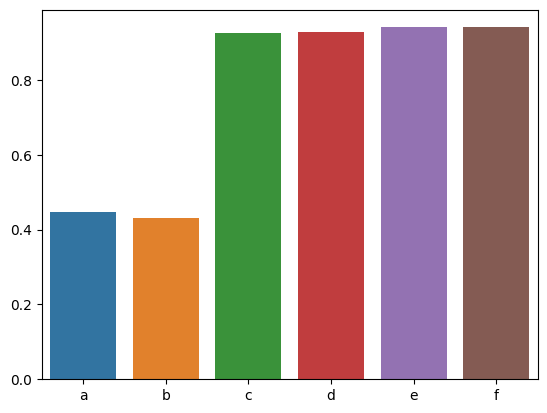

In [350]:
sns.barplot(x=["a", "b", "c", "d", "e", "f"], y=[f2score, f2score_cost_learning, f2score_res_smoteenn, f2score_res_smoteenn_cost_learning, f2score_res_adasyn,f2score_res_adasyn_cost_learning])